In [1]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

from copy import deepcopy

In [2]:
from dataset.dataloader import train_dl, test_dl, val_dl
from auto_encoder.model_422 import AutoEncoder

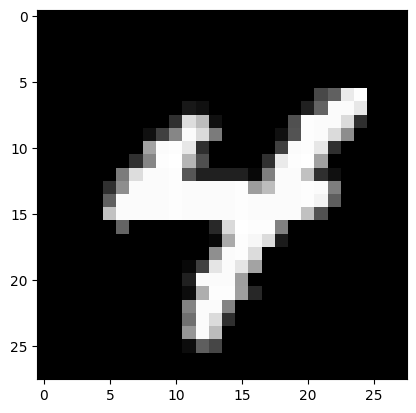

In [3]:
images, labels = next(iter(train_dl))

plt.imshow(images[0].squeeze(), cmap="gray")

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoEncoder(images.shape[1]).to(device)
device

device(type='cuda')

In [5]:
EPOCHS = 150
lr = 0.0001
loss_func = torch.nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=lr)

In [6]:
train_loss_per_epoch = []
valid_loss_per_epoch = []
counter = 0
best_model = None

for epoch in range(EPOCHS):
    print("Epoch: [{}/{}]".format(epoch+1, EPOCHS))
    train_loss = []
    val_loss = []
    for X, y in tqdm(train_dl):
        X = X.to(device)
        model.zero_grad()
        rec_X = model(X)
        loss = loss_func(X, rec_X)
        train_loss.append(loss.item())
        loss.backward()
        optim.step()

    for X, y in tqdm(val_dl):
        with torch.no_grad():
            X = X.to(device)
            rec_X = model(X)
            loss = loss_func(X, rec_X)
            val_loss.append(loss.item())
    
    train_loss_per_epoch.append(sum(train_loss)/len(train_loss))
    valid_loss_per_epoch.append(sum(val_loss)/len(val_loss))

    if valid_loss_per_epoch[-1] == min(valid_loss_per_epoch):
        counter = 0
        best_model = deepcopy(model)
    
    else:
        counter += 1

    print("\tTrain loss: {}".format(train_loss_per_epoch[-1]))
    print("\t  Val loss: {}".format(valid_loss_per_epoch[-1]))

    if counter == 10:
        print("\nEarly stop: model is not converging")
        break

Epoch: [1/150]


100%|██████████| 313/313 [00:00<00:00, 677.49it/s]


	Train loss: 0.13966161557038625
	  Val loss: 0.13142062197573268
Epoch: [2/150]


100%|██████████| 313/313 [00:00<00:00, 698.46it/s]


	Train loss: 0.12862369396885237
	  Val loss: 0.1300989217318285
Epoch: [3/150]


100%|██████████| 313/313 [00:00<00:00, 708.11it/s]


	Train loss: 0.12767527050773303
	  Val loss: 0.12913989394712752
Epoch: [4/150]


100%|██████████| 313/313 [00:00<00:00, 698.66it/s]


	Train loss: 0.12703349847197531
	  Val loss: 0.12864159956907692
Epoch: [5/150]


100%|██████████| 313/313 [00:00<00:00, 694.01it/s]


	Train loss: 0.12657630387743313
	  Val loss: 0.1281825490176868
Epoch: [6/150]


100%|██████████| 313/313 [00:00<00:00, 688.67it/s]


	Train loss: 0.12624397943814594
	  Val loss: 0.127887091840418
Epoch: [7/150]


100%|██████████| 313/313 [00:00<00:00, 711.15it/s]


	Train loss: 0.1260100047727426
	  Val loss: 0.12766292486518335
Epoch: [8/150]


100%|██████████| 313/313 [00:00<00:00, 338.04it/s]


	Train loss: 0.1258210442105929
	  Val loss: 0.12748122398560038
Epoch: [9/150]


100%|██████████| 313/313 [00:00<00:00, 706.70it/s]


	Train loss: 0.12566459936499597
	  Val loss: 0.1274543272944304
Epoch: [10/150]


100%|██████████| 313/313 [00:00<00:00, 708.15it/s]


	Train loss: 0.12552161690791447
	  Val loss: 0.12724698320650063
Epoch: [11/150]


100%|██████████| 313/313 [00:00<00:00, 721.01it/s]


	Train loss: 0.1254045485297839
	  Val loss: 0.12733374747891016
Epoch: [12/150]


100%|██████████| 313/313 [00:00<00:00, 328.26it/s]


	Train loss: 0.12507553168733915
	  Val loss: 0.12625433687870494
Epoch: [13/150]


100%|██████████| 313/313 [00:00<00:00, 656.19it/s]


	Train loss: 0.120972978023688
	  Val loss: 0.1178007561939593
Epoch: [14/150]


100%|██████████| 313/313 [00:00<00:00, 367.34it/s]


	Train loss: 0.11461178512175878
	  Val loss: 0.11390009060644875
Epoch: [15/150]


100%|██████████| 313/313 [00:00<00:00, 350.14it/s]


	Train loss: 0.11023220871885618
	  Val loss: 0.10903288288333546
Epoch: [16/150]


100%|██████████| 313/313 [00:00<00:00, 698.31it/s]


	Train loss: 0.10638929346998532
	  Val loss: 0.10597217451935759
Epoch: [17/150]


100%|██████████| 313/313 [00:00<00:00, 716.40it/s]


	Train loss: 0.10397531388600667
	  Val loss: 0.10384388584584094
Epoch: [18/150]


100%|██████████| 313/313 [00:00<00:00, 695.30it/s]


	Train loss: 0.10210354697902997
	  Val loss: 0.10198261945868453
Epoch: [19/150]


100%|██████████| 313/313 [00:00<00:00, 694.01it/s]


	Train loss: 0.10043396159013113
	  Val loss: 0.10038876250243416
Epoch: [20/150]


100%|██████████| 313/313 [00:00<00:00, 708.15it/s]


	Train loss: 0.09888193943699201
	  Val loss: 0.09889003613029425
Epoch: [21/150]


100%|██████████| 313/313 [00:00<00:00, 712.20it/s]


	Train loss: 0.097422371027867
	  Val loss: 0.0974077955602457
Epoch: [22/150]


100%|██████████| 313/313 [00:00<00:00, 704.43it/s]


	Train loss: 0.09606895189285278
	  Val loss: 0.09602049366829875
Epoch: [23/150]


100%|██████████| 313/313 [00:00<00:00, 715.68it/s]


	Train loss: 0.0948331333398819
	  Val loss: 0.09493397490475505
Epoch: [24/150]


100%|██████████| 313/313 [00:00<00:00, 695.56it/s]


	Train loss: 0.09373578124841055
	  Val loss: 0.0937567352534483
Epoch: [25/150]


100%|██████████| 313/313 [00:00<00:00, 698.38it/s]


	Train loss: 0.09274252827366193
	  Val loss: 0.0928886898647482
Epoch: [26/150]


100%|██████████| 313/313 [00:00<00:00, 697.02it/s]


	Train loss: 0.09182794814904531
	  Val loss: 0.09198209686210743
Epoch: [27/150]


100%|██████████| 313/313 [00:00<00:00, 695.29it/s]


	Train loss: 0.09095415717959404
	  Val loss: 0.09106018575140462
Epoch: [28/150]


100%|██████████| 313/313 [00:00<00:00, 721.47it/s]


	Train loss: 0.09013689055840174
	  Val loss: 0.09011119756454858
Epoch: [29/150]


100%|██████████| 313/313 [00:00<00:00, 697.56it/s]


	Train loss: 0.08937201578219732
	  Val loss: 0.08938293423229894
Epoch: [30/150]


100%|██████████| 313/313 [00:00<00:00, 717.01it/s]


	Train loss: 0.08864476387302081
	  Val loss: 0.08877371580075151
Epoch: [31/150]


100%|██████████| 313/313 [00:00<00:00, 716.30it/s]


	Train loss: 0.08796108802954355
	  Val loss: 0.08802191163309085
Epoch: [32/150]


100%|██████████| 313/313 [00:00<00:00, 667.41it/s]


	Train loss: 0.08730691913366317
	  Val loss: 0.08725287808111301
Epoch: [33/150]


100%|██████████| 313/313 [00:00<00:00, 714.22it/s]


	Train loss: 0.08668507049679756
	  Val loss: 0.08664908524328908
Epoch: [34/150]


100%|██████████| 313/313 [00:00<00:00, 686.01it/s]


	Train loss: 0.08608728356957436
	  Val loss: 0.08612492578193402
Epoch: [35/150]


100%|██████████| 313/313 [00:00<00:00, 703.24it/s]


	Train loss: 0.08550974611739318
	  Val loss: 0.08559906016142604
Epoch: [36/150]


100%|██████████| 313/313 [00:00<00:00, 729.91it/s]


	Train loss: 0.08494586345950762
	  Val loss: 0.08492911285676133
Epoch: [37/150]


100%|██████████| 313/313 [00:00<00:00, 704.83it/s]


	Train loss: 0.0843940682152907
	  Val loss: 0.08445890514424052
Epoch: [38/150]


100%|██████████| 313/313 [00:00<00:00, 739.72it/s]


	Train loss: 0.08384434700409571
	  Val loss: 0.08369413149147369
Epoch: [39/150]


100%|██████████| 313/313 [00:00<00:00, 751.02it/s]


	Train loss: 0.08331362169484298
	  Val loss: 0.08309358784470695
Epoch: [40/150]


100%|██████████| 313/313 [00:00<00:00, 725.86it/s]


	Train loss: 0.08277702465852102
	  Val loss: 0.08266057159763555
Epoch: [41/150]


100%|██████████| 313/313 [00:00<00:00, 699.96it/s]


	Train loss: 0.08224755621850491
	  Val loss: 0.08232154963782039
Epoch: [42/150]


100%|██████████| 313/313 [00:00<00:00, 714.28it/s]


	Train loss: 0.08174209187527498
	  Val loss: 0.08152782586150276
Epoch: [43/150]


100%|██████████| 313/313 [00:00<00:00, 708.26it/s]


	Train loss: 0.08122896734078726
	  Val loss: 0.08121146128390924
Epoch: [44/150]


100%|██████████| 313/313 [00:00<00:00, 709.75it/s]


	Train loss: 0.08072803182005882
	  Val loss: 0.08061617962754192
Epoch: [45/150]


100%|██████████| 313/313 [00:00<00:00, 709.75it/s]


	Train loss: 0.08022984969814619
	  Val loss: 0.08018720611787071
Epoch: [46/150]


100%|██████████| 313/313 [00:00<00:00, 706.55it/s]


	Train loss: 0.07973195872406165
	  Val loss: 0.07949355761178385
Epoch: [47/150]


100%|██████████| 313/313 [00:00<00:00, 684.90it/s]


	Train loss: 0.07923622927467028
	  Val loss: 0.07892851345836165
Epoch: [48/150]


100%|██████████| 313/313 [00:00<00:00, 690.95it/s]


	Train loss: 0.07875375615259012
	  Val loss: 0.07853727165264443
Epoch: [49/150]


100%|██████████| 313/313 [00:00<00:00, 700.71it/s]


	Train loss: 0.07828284010291099
	  Val loss: 0.07800024733566248
Epoch: [50/150]


100%|██████████| 313/313 [00:00<00:00, 719.54it/s]


	Train loss: 0.07780138766964277
	  Val loss: 0.07756497537175687
Epoch: [51/150]


100%|██████████| 313/313 [00:00<00:00, 719.54it/s]


	Train loss: 0.07731390118400255
	  Val loss: 0.07708313026890969
Epoch: [52/150]


100%|██████████| 313/313 [00:00<00:00, 701.10it/s]


	Train loss: 0.07683579302728176
	  Val loss: 0.07679870564002579
Epoch: [53/150]


100%|██████████| 313/313 [00:00<00:00, 704.82it/s]


	Train loss: 0.0763691382219394
	  Val loss: 0.07596957857330768
Epoch: [54/150]


100%|██████████| 313/313 [00:00<00:00, 690.70it/s]


	Train loss: 0.07589133441547553
	  Val loss: 0.07557923697863524
Epoch: [55/150]


100%|██████████| 313/313 [00:00<00:00, 695.56it/s]


	Train loss: 0.07541673054297765
	  Val loss: 0.07509894673816693
Epoch: [56/150]


100%|██████████| 313/313 [00:00<00:00, 692.48it/s]


	Train loss: 0.0749236512452364
	  Val loss: 0.07465907921806311
Epoch: [57/150]


100%|██████████| 313/313 [00:00<00:00, 692.48it/s]


	Train loss: 0.07443840829133988
	  Val loss: 0.07407583389133691
Epoch: [58/150]


100%|██████████| 313/313 [00:00<00:00, 690.95it/s]


	Train loss: 0.07396221355895201
	  Val loss: 0.07348522351096613
Epoch: [59/150]


100%|██████████| 313/313 [00:00<00:00, 689.43it/s]


	Train loss: 0.07347345514992873
	  Val loss: 0.0731528670357439
Epoch: [60/150]


100%|██████████| 313/313 [00:00<00:00, 684.86it/s]


	Train loss: 0.07297687100569407
	  Val loss: 0.07246554116852368
Epoch: [61/150]


100%|██████████| 313/313 [00:00<00:00, 706.55it/s]


	Train loss: 0.07249012127121289
	  Val loss: 0.07205468735184532
Epoch: [62/150]


100%|██████████| 313/313 [00:00<00:00, 689.43it/s]


	Train loss: 0.07198263889551162
	  Val loss: 0.07164160282419513
Epoch: [63/150]


100%|██████████| 313/313 [00:00<00:00, 677.38it/s]


	Train loss: 0.07149842628538608
	  Val loss: 0.07120394730529846
Epoch: [64/150]


100%|██████████| 313/313 [00:00<00:00, 708.15it/s]


	Train loss: 0.07100110523502032
	  Val loss: 0.07051942208276009
Epoch: [65/150]


100%|██████████| 313/313 [00:00<00:00, 711.37it/s]


	Train loss: 0.07048515343268712
	  Val loss: 0.07005457857403512
Epoch: [66/150]


100%|██████████| 313/313 [00:00<00:00, 712.99it/s]


	Train loss: 0.07000839595198631
	  Val loss: 0.06982093218702097
Epoch: [67/150]


100%|██████████| 313/313 [00:00<00:00, 719.54it/s]


	Train loss: 0.06951143505771955
	  Val loss: 0.06898468847091967
Epoch: [68/150]


100%|██████████| 313/313 [00:00<00:00, 721.66it/s]


	Train loss: 0.06902962574263413
	  Val loss: 0.06868198729408816
Epoch: [69/150]


100%|██████████| 313/313 [00:00<00:00, 724.54it/s]


	Train loss: 0.06853238700926303
	  Val loss: 0.06799589210567764
Epoch: [70/150]


100%|██████████| 313/313 [00:00<00:00, 723.97it/s]


	Train loss: 0.06803922735551993
	  Val loss: 0.0676021982496158
Epoch: [71/150]


100%|██████████| 313/313 [00:00<00:00, 681.92it/s]


	Train loss: 0.06754665688276291
	  Val loss: 0.06681883933778388
Epoch: [72/150]


100%|██████████| 313/313 [00:00<00:00, 687.85it/s]


	Train loss: 0.06706280084252357
	  Val loss: 0.06639640577161274
Epoch: [73/150]


100%|██████████| 313/313 [00:00<00:00, 688.96it/s]


	Train loss: 0.06657695476313433
	  Val loss: 0.06585570960380017
Epoch: [74/150]


100%|██████████| 313/313 [00:00<00:00, 697.11it/s]


	Train loss: 0.06609228131572406
	  Val loss: 0.06558804304455035
Epoch: [75/150]


100%|██████████| 313/313 [00:00<00:00, 709.75it/s]


	Train loss: 0.06561438147127628
	  Val loss: 0.06488697595013597
Epoch: [76/150]


100%|██████████| 313/313 [00:00<00:00, 708.97it/s]


	Train loss: 0.06513509223163128
	  Val loss: 0.06481189960346054
Epoch: [77/150]


100%|██████████| 313/313 [00:00<00:00, 691.71it/s]


	Train loss: 0.0646713718354702
	  Val loss: 0.06409595784145042
Epoch: [78/150]


100%|██████████| 313/313 [00:00<00:00, 689.43it/s]


	Train loss: 0.0641926549444596
	  Val loss: 0.06373075286325175
Epoch: [79/150]


100%|██████████| 313/313 [00:00<00:00, 707.83it/s]


	Train loss: 0.06375273447235426
	  Val loss: 0.06285246630636648
Epoch: [80/150]


100%|██████████| 313/313 [00:00<00:00, 709.13it/s]


	Train loss: 0.06329027295807997
	  Val loss: 0.06260903687856068
Epoch: [81/150]


100%|██████████| 313/313 [00:00<00:00, 711.37it/s]


	Train loss: 0.06285887700517973
	  Val loss: 0.06212424789183437
Epoch: [82/150]


100%|██████████| 313/313 [00:00<00:00, 703.12it/s]


	Train loss: 0.06241587310930093
	  Val loss: 0.06175896884819951
Epoch: [83/150]


100%|██████████| 313/313 [00:00<00:00, 679.69it/s]


	Train loss: 0.06198251176675161
	  Val loss: 0.0612624856039358
Epoch: [84/150]


100%|██████████| 313/313 [00:00<00:00, 698.66it/s]


	Train loss: 0.06158990620275338
	  Val loss: 0.0615928628074285
Epoch: [85/150]


100%|██████████| 313/313 [00:00<00:00, 719.37it/s]


	Train loss: 0.06119695248901844
	  Val loss: 0.06108353422663082
Epoch: [86/150]


100%|██████████| 313/313 [00:00<00:00, 698.66it/s]


	Train loss: 0.060823844967285795
	  Val loss: 0.05998742482818354
Epoch: [87/150]


100%|██████████| 313/313 [00:00<00:00, 703.37it/s]


	Train loss: 0.06044550937414169
	  Val loss: 0.05991746913701201
Epoch: [88/150]


100%|██████████| 313/313 [00:00<00:00, 700.23it/s]


	Train loss: 0.060076597359776496
	  Val loss: 0.05950655970282067
Epoch: [89/150]


100%|██████████| 313/313 [00:00<00:00, 687.79it/s]


	Train loss: 0.059730244343479476
	  Val loss: 0.05900058917963086
Epoch: [90/150]


100%|██████████| 313/313 [00:00<00:00, 712.99it/s]


	Train loss: 0.05937348080873489
	  Val loss: 0.058856466886239314
Epoch: [91/150]


100%|██████████| 313/313 [00:00<00:00, 684.90it/s]


	Train loss: 0.05904435738325119
	  Val loss: 0.05837605234247427
Epoch: [92/150]


100%|██████████| 313/313 [00:00<00:00, 684.63it/s]


	Train loss: 0.05873933966954549
	  Val loss: 0.05797420725369225
Epoch: [93/150]


100%|██████████| 313/313 [00:00<00:00, 677.49it/s]


	Train loss: 0.058390671421090765
	  Val loss: 0.057605461071664914
Epoch: [94/150]


100%|██████████| 313/313 [00:00<00:00, 657.56it/s]


	Train loss: 0.058098516553640366
	  Val loss: 0.057381447476034346
Epoch: [95/150]


100%|██████████| 313/313 [00:00<00:00, 695.84it/s]


	Train loss: 0.057802260278662046
	  Val loss: 0.056970989456572856
Epoch: [96/150]


100%|██████████| 313/313 [00:00<00:00, 721.20it/s]


	Train loss: 0.057492316539088886
	  Val loss: 0.056999794555643496
Epoch: [97/150]


100%|██████████| 313/313 [00:00<00:00, 712.91it/s]


	Train loss: 0.05722571590344111
	  Val loss: 0.056783367686283094
Epoch: [98/150]


100%|██████████| 313/313 [00:00<00:00, 727.91it/s]


	Train loss: 0.05693870218296846
	  Val loss: 0.05632125562467514
Epoch: [99/150]


100%|██████████| 313/313 [00:00<00:00, 703.37it/s]


	Train loss: 0.056678193777799604
	  Val loss: 0.055930380385142926
Epoch: [100/150]


100%|██████████| 313/313 [00:00<00:00, 716.35it/s]


	Train loss: 0.0564282082170248
	  Val loss: 0.0557148426342696
Epoch: [101/150]


100%|██████████| 313/313 [00:00<00:00, 667.50it/s]


	Train loss: 0.056163003328442575
	  Val loss: 0.05533365681529426
Epoch: [102/150]


100%|██████████| 313/313 [00:00<00:00, 689.43it/s]


	Train loss: 0.055903669128815336
	  Val loss: 0.055321456668095084
Epoch: [103/150]


100%|██████████| 313/313 [00:00<00:00, 677.42it/s]


	Train loss: 0.055680889000495275
	  Val loss: 0.0549051443608805
Epoch: [104/150]


100%|██████████| 313/313 [00:00<00:00, 703.37it/s]


	Train loss: 0.05545529336134593
	  Val loss: 0.05491437923651153
Epoch: [105/150]


100%|██████████| 313/313 [00:00<00:00, 710.30it/s]


	Train loss: 0.055223632530371346
	  Val loss: 0.05454735354350779
Epoch: [106/150]


100%|██████████| 313/313 [00:00<00:00, 688.48it/s]


	Train loss: 0.05500208801428477
	  Val loss: 0.05423358535042967
Epoch: [107/150]


100%|██████████| 313/313 [00:00<00:00, 694.87it/s]


	Train loss: 0.054793613477547964
	  Val loss: 0.0542868481824002
Epoch: [108/150]


100%|██████████| 313/313 [00:00<00:00, 682.66it/s]


	Train loss: 0.05456123877167702
	  Val loss: 0.05395489009900596
Epoch: [109/150]


100%|██████████| 313/313 [00:00<00:00, 706.55it/s]


	Train loss: 0.05437419394056002
	  Val loss: 0.053520711977927446
Epoch: [110/150]


100%|██████████| 313/313 [00:00<00:00, 709.75it/s]


	Train loss: 0.05417801548143228
	  Val loss: 0.053542008224767616
Epoch: [111/150]


100%|██████████| 313/313 [00:00<00:00, 704.85it/s]


	Train loss: 0.053961160637935005
	  Val loss: 0.05339018720835923
Epoch: [112/150]


100%|██████████| 313/313 [00:00<00:00, 709.75it/s]


	Train loss: 0.0537596946199735
	  Val loss: 0.05309112089129683
Epoch: [113/150]


100%|██████████| 313/313 [00:00<00:00, 715.90it/s]


	Train loss: 0.05357374019225439
	  Val loss: 0.052690379666729854
Epoch: [114/150]


100%|██████████| 313/313 [00:00<00:00, 698.66it/s]


	Train loss: 0.05340777079363664
	  Val loss: 0.05316251067641063
Epoch: [115/150]


100%|██████████| 313/313 [00:00<00:00, 713.79it/s]


	Train loss: 0.0531935984502236
	  Val loss: 0.052569410338188516
Epoch: [116/150]


100%|██████████| 313/313 [00:00<00:00, 687.92it/s]


	Train loss: 0.053051020008325574
	  Val loss: 0.05239869161440541
Epoch: [117/150]


100%|██████████| 313/313 [00:00<00:00, 708.15it/s]


	Train loss: 0.05286990957458814
	  Val loss: 0.05238471652705449
Epoch: [118/150]


100%|██████████| 313/313 [00:00<00:00, 696.84it/s]


	Train loss: 0.05266759930054347
	  Val loss: 0.0522266250734512
Epoch: [119/150]


100%|██████████| 313/313 [00:00<00:00, 700.15it/s]


	Train loss: 0.052506400561332704
	  Val loss: 0.052093443445885144
Epoch: [120/150]


100%|██████████| 313/313 [00:00<00:00, 707.30it/s]


	Train loss: 0.05231270505885283
	  Val loss: 0.05207456536472034
Epoch: [121/150]


100%|██████████| 313/313 [00:00<00:00, 698.66it/s]


	Train loss: 0.0521638235916694
	  Val loss: 0.05150326108113645
Epoch: [122/150]


100%|██████████| 313/313 [00:00<00:00, 711.37it/s]


	Train loss: 0.05200762597719828
	  Val loss: 0.05129276609982546
Epoch: [123/150]


100%|██████████| 313/313 [00:00<00:00, 689.43it/s]


	Train loss: 0.05183136092623075
	  Val loss: 0.05120332797352498
Epoch: [124/150]


100%|██████████| 313/313 [00:00<00:00, 664.54it/s]


	Train loss: 0.0516771087517341
	  Val loss: 0.051091765598081554
Epoch: [125/150]


100%|██████████| 313/313 [00:00<00:00, 667.37it/s]


	Train loss: 0.0515372588266929
	  Val loss: 0.05117949929100256
Epoch: [126/150]


100%|██████████| 313/313 [00:00<00:00, 716.85it/s]


	Train loss: 0.05137241535981496
	  Val loss: 0.05090062673718404
Epoch: [127/150]


100%|██████████| 313/313 [00:00<00:00, 704.96it/s]


	Train loss: 0.05121012531717618
	  Val loss: 0.05042000502919237
Epoch: [128/150]


100%|██████████| 313/313 [00:00<00:00, 708.15it/s]


	Train loss: 0.05106028489470482
	  Val loss: 0.05022519581710188
Epoch: [129/150]


100%|██████████| 313/313 [00:00<00:00, 733.02it/s]


	Train loss: 0.050925885375340776
	  Val loss: 0.05011634865460304
Epoch: [130/150]


100%|██████████| 313/313 [00:00<00:00, 703.08it/s]


	Train loss: 0.05076265415251255
	  Val loss: 0.04993936684899056
Epoch: [131/150]


100%|██████████| 313/313 [00:00<00:00, 703.37it/s]


	Train loss: 0.050623996595541634
	  Val loss: 0.05025418268177456
Epoch: [132/150]


100%|██████████| 313/313 [00:00<00:00, 680.44it/s]


	Train loss: 0.050496104303499066
	  Val loss: 0.04987299557739553
Epoch: [133/150]


100%|██████████| 313/313 [00:00<00:00, 711.06it/s]


	Train loss: 0.05034846072395643
	  Val loss: 0.04981651966468976
Epoch: [134/150]


100%|██████████| 313/313 [00:00<00:00, 717.55it/s]


	Train loss: 0.050189859028657274
	  Val loss: 0.04949219135668712
Epoch: [135/150]


100%|██████████| 313/313 [00:00<00:00, 715.91it/s]


	Train loss: 0.05008349235355854
	  Val loss: 0.05022986336780813
Epoch: [136/150]


100%|██████████| 313/313 [00:00<00:00, 685.24it/s]


	Train loss: 0.04994926635622978
	  Val loss: 0.049292026045985114
Epoch: [137/150]


100%|██████████| 313/313 [00:00<00:00, 716.25it/s]


	Train loss: 0.049799238541722295
	  Val loss: 0.0488604213744878
Epoch: [138/150]


100%|██████████| 313/313 [00:00<00:00, 683.41it/s]


	Train loss: 0.04968276765942574
	  Val loss: 0.04904712475955296
Epoch: [139/150]


100%|██████████| 313/313 [00:00<00:00, 715.43it/s]


	Train loss: 0.049558810492356616
	  Val loss: 0.04895568291504924
Epoch: [140/150]


100%|██████████| 313/313 [00:00<00:00, 687.73it/s]


	Train loss: 0.049437826207280156
	  Val loss: 0.04861701145387305
Epoch: [141/150]


100%|██████████| 313/313 [00:00<00:00, 708.15it/s]


	Train loss: 0.04929123776356379
	  Val loss: 0.04860556950441565
Epoch: [142/150]


100%|██████████| 313/313 [00:00<00:00, 714.08it/s]


	Train loss: 0.04917804417014122
	  Val loss: 0.04846853903307321
Epoch: [143/150]


100%|██████████| 313/313 [00:00<00:00, 706.55it/s]


	Train loss: 0.04907171420206626
	  Val loss: 0.048210347029633414
Epoch: [144/150]


100%|██████████| 313/313 [00:00<00:00, 669.87it/s]


	Train loss: 0.04894471547206243
	  Val loss: 0.04824764156541504
Epoch: [145/150]


100%|██████████| 313/313 [00:00<00:00, 676.03it/s]


	Train loss: 0.048799895373980204
	  Val loss: 0.048291146564788334
Epoch: [146/150]


100%|██████████| 313/313 [00:00<00:00, 697.11it/s]


	Train loss: 0.048714688309530414
	  Val loss: 0.04796652400645966
Epoch: [147/150]


100%|██████████| 313/313 [00:00<00:00, 702.29it/s]


	Train loss: 0.04857944273451964
	  Val loss: 0.04805914213815436
Epoch: [148/150]


100%|██████████| 313/313 [00:00<00:00, 712.99it/s]


	Train loss: 0.04847922860383987
	  Val loss: 0.04835898862383998
Epoch: [149/150]


100%|██████████| 313/313 [00:00<00:00, 709.77it/s]


	Train loss: 0.048362176070610684
	  Val loss: 0.048189210934570424
Epoch: [150/150]


100%|██████████| 313/313 [00:00<00:00, 700.74it/s]

	Train loss: 0.04827858894666036
	  Val loss: 0.047704909460994004


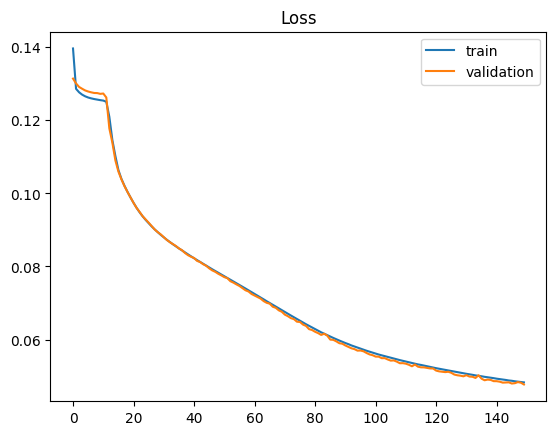

In [7]:
plt.plot(train_loss_per_epoch, label="train")
plt.plot(valid_loss_per_epoch, label="validation")
plt.legend()
plt.title("Loss")

plt.show()

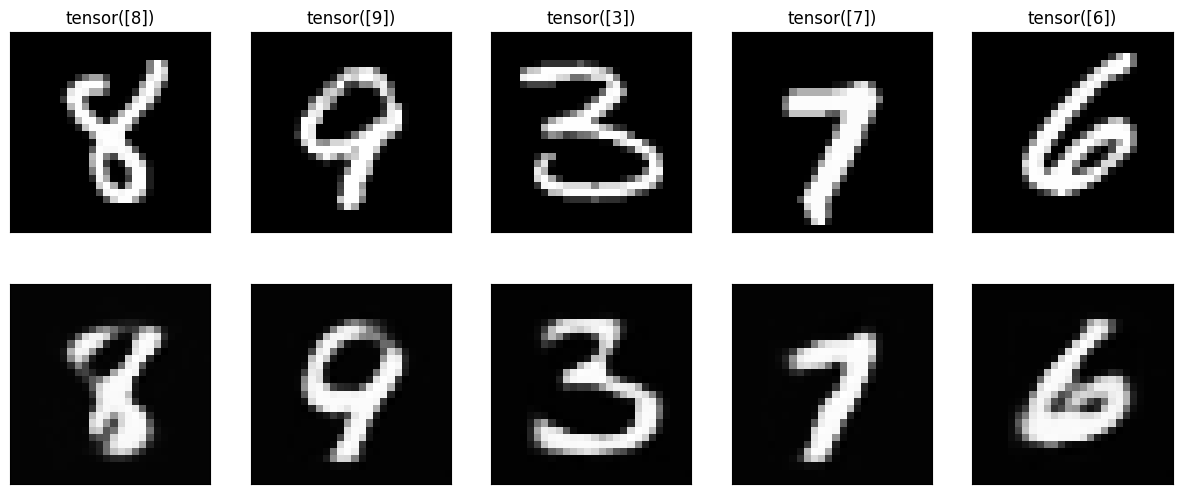

In [10]:

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
i = 0
skip = 0

for image, label in test_dl:
    if skip > 0:
        skip -= 1
        continue
    
    with torch.no_grad():
        rec = best_model(image.to(device))

    axs[0][i].imshow(image[0].squeeze(), cmap="gray")
    axs[1][i].imshow(rec[0].squeeze().cpu(), cmap="gray")
    axs[0][i].set_title(str(label))
    axs[0][i].set_xticks([])
    axs[0][i].set_yticks([])
    axs[1][i].set_xticks([])
    axs[1][i].set_yticks([])

    i += 1

    if i == 5:
        break

In [9]:
torch.save(best_model.state_dict(), "auto_encoder/weights/ae_4_2_2.dat")